<a href="https://colab.research.google.com/github/RAGHAV-GARG08/Minor-project/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download("cat", limit =30, output_dir = "images", adult_filter_off = True)

[%] Downloading Images to /content/images/cat


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/knGhzlGsGtk/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/0Vf5YHtvggY/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/36/5f/6a/365f6adf7ef9f6c110235d63159e3b50.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/05/af/eb/05afeb21d128fda31d251527b3084102.png
[%] File Downloaded !

[%] Downloading Image #5 from https://www.purina.com/sites/g/files/auxxlc196/files/styles/kraken_generic_max_width_960/public/TrueNatureArticle_Header_2.jpg?itok=7ICowKBt
[%] File Downloaded !

[%] Downloading Image #6 from http://moderncat.com/sites/default/files/images/articles/top_images/TrueCatFacts-header.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://theconservativehillbilly.files.wordpress.com/2

In [ ]:
from bing_image_downloader import downloader
downloader.download("dog", limit =30, output_dir = "images", adult_filter_off = True)

[%] Downloading Images to /content/images/dog


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://cdn.newsapi.com.au/image/v1/098fe707e818d4d04deb0e27af7186bd?width=650
[%] File Downloaded !

[%] Downloading Image #2 from http://schoolmum.net/wp-content/uploads/2016/12/RedDog-TrueBlue-FULL.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.ffx.io/images/$width_620%2C$height_414/t_crop_fill/q_86%2Cf_auto/t_theage_no_label_social_wm/l_text:PT Sans_41_bold_italic: from %2Cg_south_west%2Cy_84%2Cx_384%2Cco_rgb:0a1633/l_text:PT Sans_41_bold:  %2Cg_south_west%2Cy_90%2Cx_471%2Cco_rgb:0a1633/l_text:AbrilTitling-Bold.ttf_83: 2012 %2Cg_south_west%2Cy_15%2Cx_370%2Cco_rgb:0a1633/c948ee51fe003a1416ba1fd5de5d5fcf23452d74
[!] Issue getting: https://static.ffx.io/images/$width_620%2C$height_414/t_crop_fill/q_86%2Cf_auto/t_theage_no_label_social_wm/l_text:PT Sans_41_bold_italic: from %2Cg_south_west%2Cy_84%2Cx_384%2Cco_rgb:0a1633/l_text:P

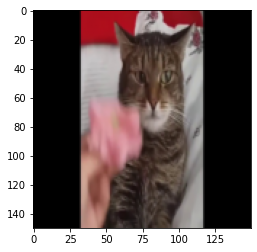

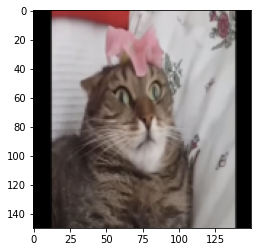

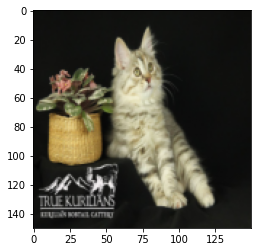

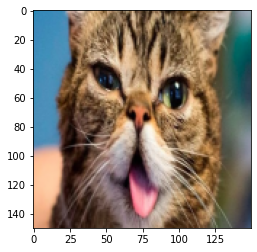

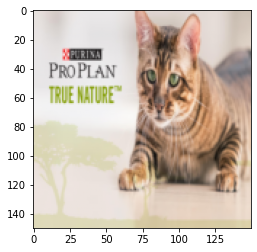

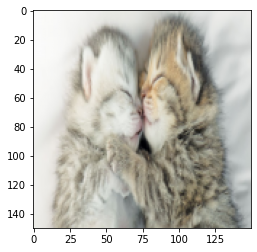

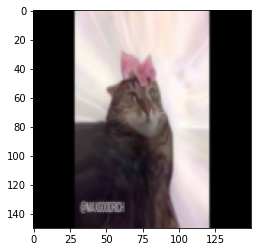

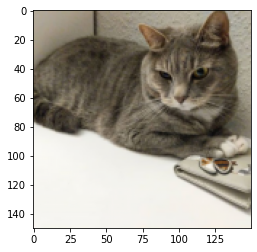

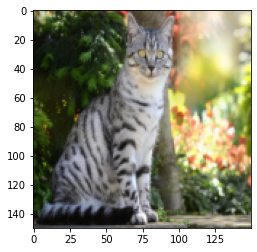

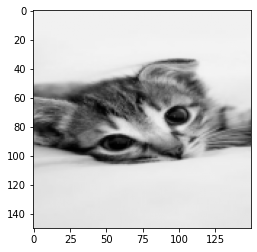

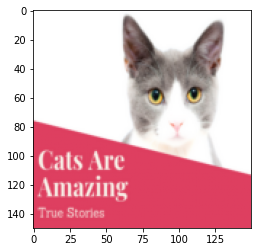

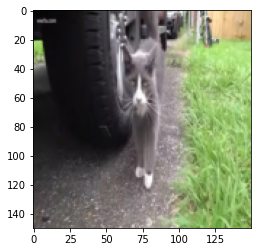

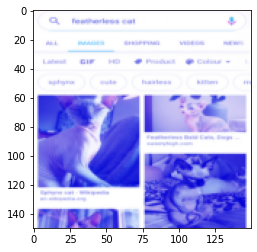

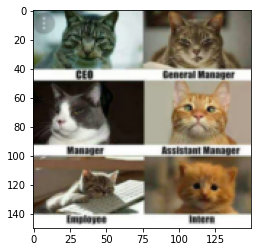

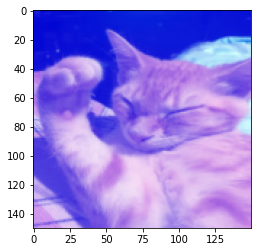

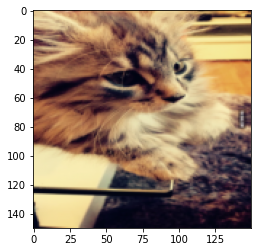

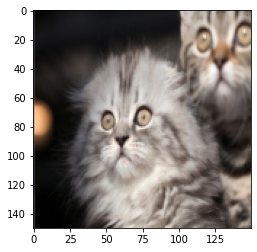

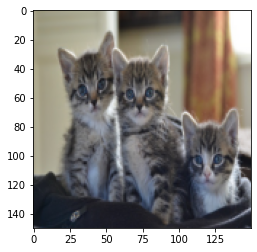

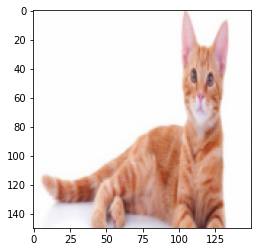

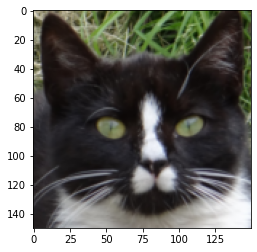

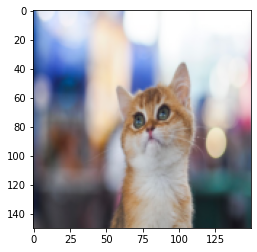

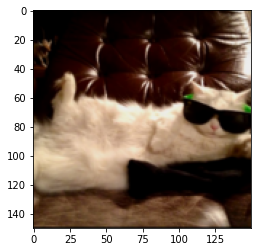

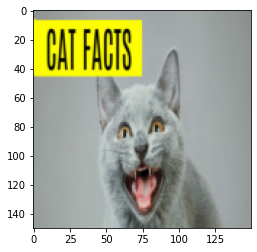

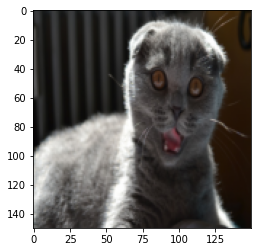

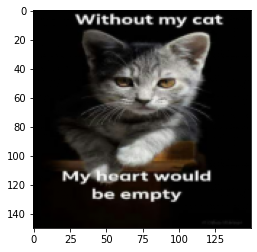

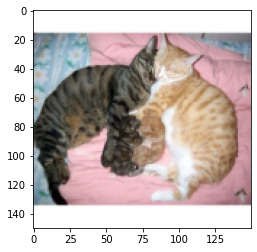

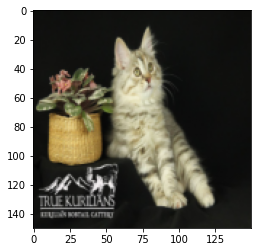

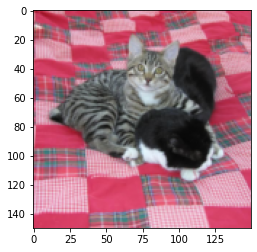

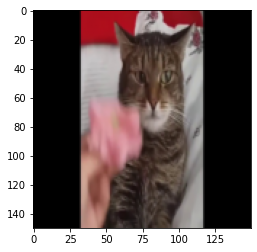

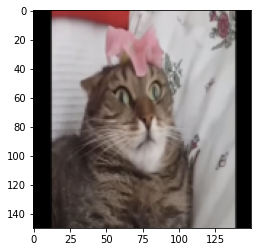

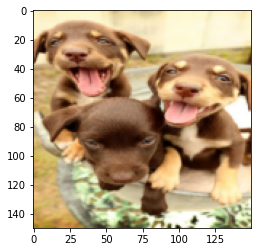

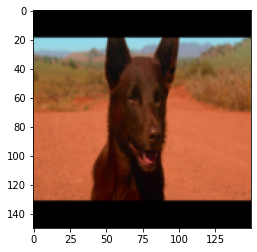

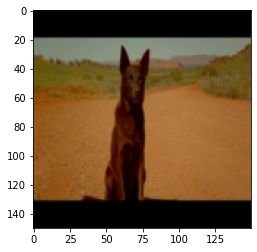

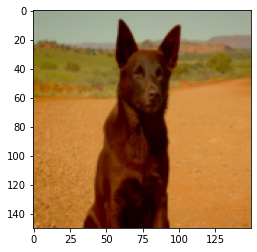

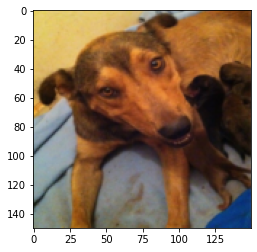

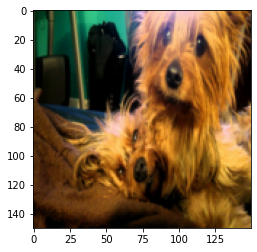

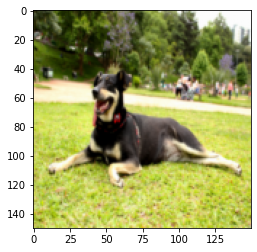

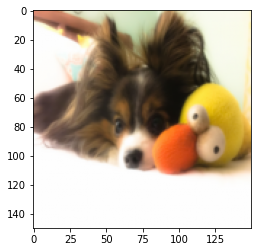

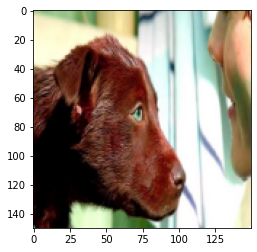

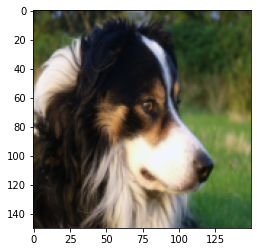

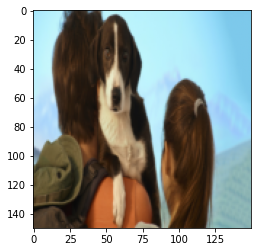

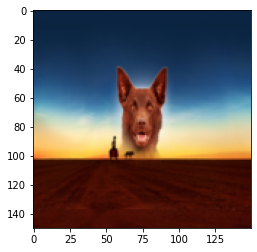

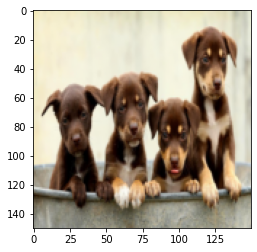

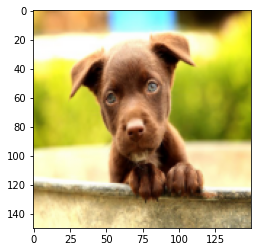

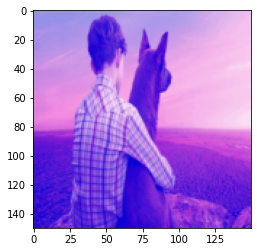

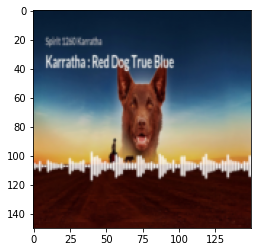

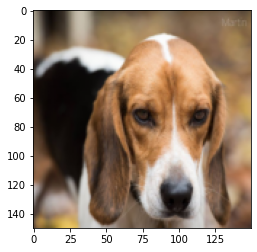

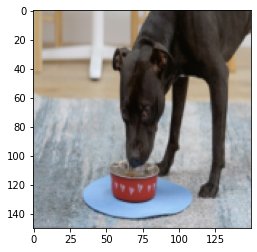

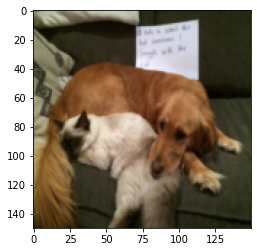

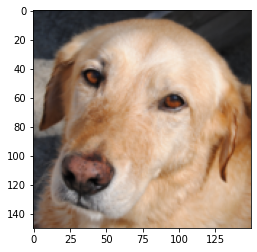

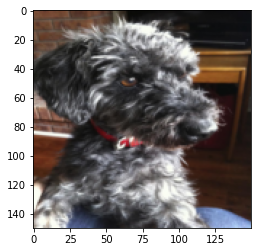

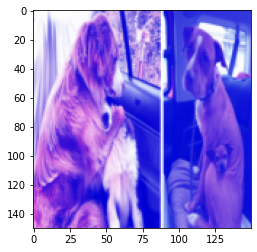

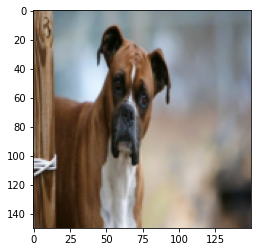

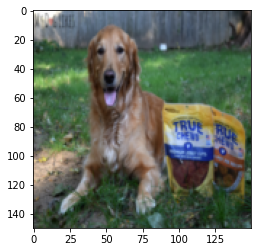

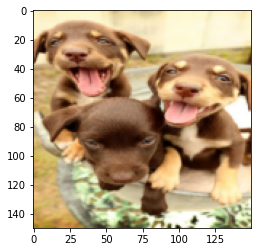

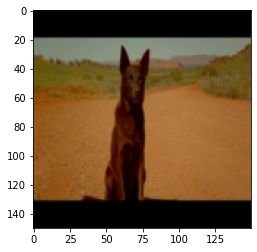

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/smartknower/minor project/images'

categories = ['cat','dog'] # Name the folder with these categories
target = []
flat_data = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
   # print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target)

In [ ]:
len(flat_data[0])

67500

2500

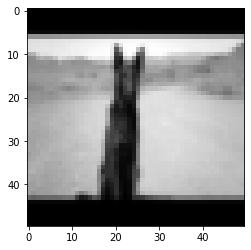

In [ ]:
from skimage.color import rgb2gray

img_resize = resize(img_array,(50,50))
img_gray = rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

0         1         2         3  ...     67497     67498     67499  Target
0  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000     cat
1  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000     cat
2  0.062745  0.062745  0.054902  0.062745  ...  0.113725  0.117647  0.098039     cat
3  0.147941  0.527255  0.704804  0.165588  ...  0.250588  0.327059  0.447745     cat
4  0.901961  0.882353  0.866667  0.901961  ...  0.862745  0.815686  0.658824     cat

[5 rows x 67501 columns]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test =  train_test_split(flat_data, target, test_size = .3, random_state = 10)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C' : [1,10,100,1000], 'kernel': ['linear'] },
              {'C' :  [1,10,100,1000], 'gamma': [0.001 , 0.0001],'kernel': ['rbf']}
]

svc = svm.SVC(probability = True)
cif = GridSearchCV(svc,param_grid)
cif.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = cif.predict(x_test)
y_pred

array(['dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat',
       'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat'],
      dtype='<U3')

In [ ]:
y_test

array(['dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat',
       'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog'],
      dtype='<U3')

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix


In [ ]:
accuracy_score(y_pred,y_test)

0.6470588235294118

In [ ]:
import pickle
pickle.dump(cif,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRj-7_JhI9S0U5R8c39_xrb0k9X3vTqWZDHqA&usqp=CAU
 PREDICTED OUTPUT: ['cat']


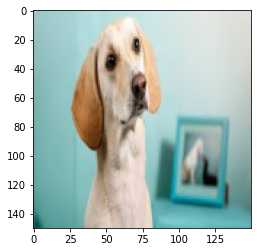

In [ ]:
import numpy as np
flat_data = []
url = input('Enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out =  [y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')